# Image classification using TensorFlow

### Springboard Career Track Capstone Project 2

#### Linear Model in TensorFlow

#### Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline 
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.pylabtools import figsize
figsize(12, 8)

#### Import data

Data acquired from https://www.cs.toronto.edu/~kriz/cifar.html

In [5]:
import tarfile
tar = tarfile.open("cifar-10-python.tar.gz")
tar.extractall()
tar.close()

#### Create function to unpickle data

In [6]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [7]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """  
    from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
    encoder = LabelBinarizer()
    encoder.fit(range(10))

    return encoder.transform(x)

#### Assign batch names, unpickle batches, and concatenate

In [8]:
f1 = 'cifar-10-batches-py\data_batch_1'
f2 = 'cifar-10-batches-py\data_batch_2'
f3 = 'cifar-10-batches-py\data_batch_3'
f4 = 'cifar-10-batches-py\data_batch_4'
f5 = 'cifar-10-batches-py\data_batch_5'
x_test = 'cifar-10-batches-py\\test_batch'
label_names = 'cifar-10-batches-py\\batches.meta'

In [9]:
b1 = unpickle(f1)

In [10]:
b1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [11]:
train_y1 = b1.get(b'labels')
b1data = b1.get(b'data')

b2 = unpickle(f2)
train_y2 = b2.get(b'labels')
b2data = b2.get(b'data')

b3 = unpickle(f3)
train_y3 = b3.get(b'labels')
b3data = b3.get(b'data')

b4 = unpickle(f4)
train_y4 = b4.get(b'labels')
b4data = b4.get(b'data')

b5 = unpickle(f5)
train_y5 = b5.get(b'labels')
b5data = b5.get(b'data')

x_train = np.concatenate((b1data, b2data, b3data, b4data, b5data), axis=0)
y_train = np.concatenate((train_y1, train_y2, train_y3, train_y4, train_y5), axis=0)

y_train_cls = y_train
y_train = one_hot_encode(y_train)

test = unpickle(x_test)
x_test = test.get(b'data')
y_test_cls = test.get(b'labels')
y_test = one_hot_encode(y_test_cls)
label_names = unpickle(label_names)

In [12]:
x_train.shape

(50000, 3072)

In [13]:
x_train

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ..., 
       [ 35,  40,  42, ...,  77,  66,  50],
       [189, 186, 185, ..., 169, 171, 171],
       [229, 236, 234, ..., 173, 162, 161]], dtype=uint8)

In [14]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ..., 
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [15]:
y_train.shape

(50000, 10)

In [16]:
label_names

{b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_cases_per_batch': 10000,
 b'num_vis': 3072}

In [17]:
x_test.shape

(10000, 3072)

In [18]:
y_test.shape

(10000, 10)

Using Keras (adapted from https://blog.keras.io/keras-as-a-simplified-interface-to-tensorflow-tutorial.html)

In [ ]:
import tensorflow as tf
sess = tf.Session()

from keras import backend as K
K.set_session(sess)

In [ ]:
img = tf.placeholder(tf.float32, shape=(None, 3072))

In [ ]:
from keras.layers import Dense

# Keras layers can be called on TensorFlow tensors:
x = Dense(128, activation='relu')(img)  # fully-connected layer with 128 units and ReLU activation
x = Dense(128, activation='relu')(x)
preds = Dense(10, activation='softmax')(x)  # output layer with 10 units and a softmax activation

In [ ]:
labels = tf.placeholder(tf.float32, shape=(None, 10))

from keras.objectives import categorical_crossentropy
loss = tf.reduce_mean(categorical_crossentropy(labels, preds))

In [ ]:
# from tensorflow.examples.tutorials.mnist import input_data
# mnist_data = input_data.read_data_sets('MNIST_data', one_hot=True)

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

# Initialize all variables
init_op = tf.global_variables_initializer()
sess.run(init_op)

# Run training loop
with sess.as_default():
    for i in range(100):
        batch = x_train.next_batch(50)
        train_step.run(feed_dict={img: x_train,
                                  labels: y_train})

In [ ]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
batch_size = 500

# Initialize all variables
init_op = tf.global_variables_initializer()
sess.run(init_op)

# Run training loop
with sess.as_default():
    for i in range(100):
        j = 0
        x_train_batch = x_train[j:j+batch_size,]
        y_train_batch = y_train[j:j+batch_size,]
        j = j + batch_size
        if j > x_train.shape[0]:
            j = 0
            
        train_step.run(feed_dict={img: x_train_batch,
                                  labels: y_train_batch})

In [ ]:
from keras.metrics import categorical_accuracy as accuracy

acc_value = accuracy(labels, preds)
with sess.as_default():
    print(acc_value.eval(feed_dict={img: x_test,
                                    labels: y_test}))

Using baseline model Keras example from https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

In [19]:
import tensorflow as tf
sess = tf.Session()

from keras import backend as K
K.set_session(sess)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import keras.utils

In [20]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [21]:
num_pixels = 32 * 32 * 3
num_classes = 10

# build the model
model = baseline_model()
# Fit the model
model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=10, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
606s - loss: 14.5166 - acc: 0.0994 - val_loss: 14.4660 - val_acc: 0.1025
Epoch 2/10
628s - loss: 14.5164 - acc: 0.0994 - val_loss: 14.4660 - val_acc: 0.1025
Epoch 3/10


KeyboardInterrupt: 

Run with normalized inputs

In [20]:
# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

In [21]:
num_pixels = 32 * 32 * 3
num_classes = 10

from keras import optimizers

# build the model
model = baseline_model()
# Fit the model
model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=1000, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
49s - loss: 14.1651 - acc: 0.1005 - val_loss: 14.5385 - val_acc: 0.0980
Epoch 2/10
48s - loss: 14.4982 - acc: 0.1005 - val_loss: 14.5385 - val_acc: 0.0980
Epoch 3/10
47s - loss: 14.4982 - acc: 0.1005 - val_loss: 14.5385 - val_acc: 0.0980
Epoch 4/10
48s - loss: 14.4982 - acc: 0.1005 - val_loss: 14.5385 - val_acc: 0.0980
Epoch 5/10
48s - loss: 14.4982 - acc: 0.1005 - val_loss: 14.5385 - val_acc: 0.0980
Epoch 6/10
48s - loss: 14.4982 - acc: 0.1005 - val_loss: 14.5385 - val_acc: 0.0980
Epoch 7/10
48s - loss: 14.4982 - acc: 0.1005 - val_loss: 14.5385 - val_acc: 0.0980
Epoch 8/10
48s - loss: 14.4982 - acc: 0.1005 - val_loss: 14.5385 - val_acc: 0.0980
Epoch 9/10
48s - loss: 14.4982 - acc: 0.1005 - val_loss: 14.5385 - val_acc: 0.0980
Epoch 10/10
48s - loss: 14.4982 - acc: 0.1005 - val_loss: 14.5385 - val_acc: 0.0980


Baseline Error: 90.00%


In [22]:
num_pixels = 32 * 32 * 3   # 3072
num_classes = 10

from keras.optimizers import Adam

# define baseline model
def baseline_plus_hidden():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# build the model
model = baseline_plus_hidden()
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
105s - loss: 2.3060 - acc: 0.1017 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/10
104s - loss: 2.3027 - acc: 0.0982 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/10
103s - loss: 2.3037 - acc: 0.0970 - val_loss: 2.3026 - val_acc: 0.1001
Epoch 4/10
103s - loss: 2.3032 - acc: 0.0982 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/10
103s - loss: 2.3027 - acc: 0.0991 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/10
105s - loss: 2.3027 - acc: 0.0981 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/10
120s - loss: 2.3030 - acc: 0.0958 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 8/10


KeyboardInterrupt: 

In [25]:
num_pixels = 32 * 32 * 3   # 3072
num_classes = 10

from keras.optimizers import Adam

# define baseline model
def baseline_plus_hidden():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# build the model
model = baseline_plus_hidden()
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
97s - loss: 2.2646 - acc: 0.1595 - val_loss: 2.1757 - val_acc: 0.2011
Epoch 2/10
91s - loss: 2.1155 - acc: 0.2015 - val_loss: 2.0545 - val_acc: 0.2521
Epoch 3/10
90s - loss: 2.0453 - acc: 0.2362 - val_loss: 1.9957 - val_acc: 0.2803
Epoch 4/10
90s - loss: 2.0002 - acc: 0.2583 - val_loss: 1.9531 - val_acc: 0.2946
Epoch 5/10
89s - loss: 1.9686 - acc: 0.2740 - val_loss: 1.9255 - val_acc: 0.3062
Epoch 6/10
89s - loss: 1.9516 - acc: 0.2825 - val_loss: 1.9076 - val_acc: 0.3120
Epoch 7/10
89s - loss: 1.9357 - acc: 0.2923 - val_loss: 1.8935 - val_acc: 0.3189
Epoch 8/10
89s - loss: 1.9218 - acc: 0.2991 - val_loss: 1.8787 - val_acc: 0.3208
Epoch 9/10
89s - loss: 1.9071 - acc: 0.3066 - val_loss: 1.8670 - val_acc: 0.3248
Epoch 10/10
90s - loss: 1.8976 - acc: 0.3110 - val_loss: 1.8522 - val_acc: 0.3332


Baseline Error: 66.68%


In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
# from keras import backend as K
# K.set_image_dim_ordering('tf')

In [74]:
# # load data
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()
# # reshape to be [samples][pixels][width][height]
# X_train = X_train.reshape(X_train.shape[0], 3, 32, 32).astype('float32')
# X_test = X_test.reshape(X_test.shape[0], 3, 32, 32).astype('float32')

In [19]:
# # normalize inputs from 0-255 to 0-1
# x_train = x_train / 255
# x_test = x_test / 255
# # one hot encode outputs
# y_train = np_utils.to_categorical(y_train)
# y_test = np_utils.to_categorical(y_test)
# num_classes = y_train.shape[1]
# num_classes

10

In [18]:
X_train = x_train.reshape(50000, 32, 32, 3)
X_test = x_test.reshape(10000, 32, 32, 3)

In [55]:
def convolution_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(32, 32, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [57]:
# build the model
model = convolution_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Convolution Error: %.2f%%" % (100-scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
67s - loss: 2.0858 - acc: 0.2374 - val_loss: 1.9498 - val_acc: 0.3084
Epoch 2/10
64s - loss: 1.8942 - acc: 0.3228 - val_loss: 1.8188 - val_acc: 0.3567
Epoch 3/10
71s - loss: 1.7938 - acc: 0.3618 - val_loss: 1.7492 - val_acc: 0.3727
Epoch 4/10
78s - loss: 1.7305 - acc: 0.3837 - val_loss: 1.6826 - val_acc: 0.4070
Epoch 5/10
75s - loss: 1.6815 - acc: 0.4017 - val_loss: 1.6410 - val_acc: 0.4181
Epoch 6/10
65s - loss: 1.6424 - acc: 0.4150 - val_loss: 1.5986 - val_acc: 0.4317
Epoch 7/10
64s - loss: 1.6049 - acc: 0.4249 - val_loss: 1.5761 - val_acc: 0.4405
Epoch 8/10
77s - loss: 1.5757 - acc: 0.4361 - val_loss: 1.5376 - val_acc: 0.4544
Epoch 9/10
83s - loss: 1.5490 - acc: 0.4449 - val_loss: 1.5118 - val_acc: 0.4647
Epoch 10/10
80s - loss: 1.5279 - acc: 0.4540 - val_loss: 1.4950 - val_acc: 0.4709


Baseline Error: 52.91%


In [60]:
def convolution2_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(32, 32, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# build the model
model = convolution2_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=200, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Convolution Error with 2 hidden layers: %.2f%%" % (100-scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
121s - loss: 2.0900 - acc: 0.2266 - val_loss: 1.9423 - val_acc: 0.3001
Epoch 2/100
113s - loss: 1.9325 - acc: 0.2956 - val_loss: 1.8936 - val_acc: 0.3120
Epoch 3/100
124s - loss: 1.8715 - acc: 0.3237 - val_loss: 1.8090 - val_acc: 0.3490
Epoch 4/100
124s - loss: 1.8107 - acc: 0.3503 - val_loss: 1.7542 - val_acc: 0.3762
Epoch 5/100
127s - loss: 1.7631 - acc: 0.3670 - val_loss: 1.7163 - val_acc: 0.3847
Epoch 6/100
128s - loss: 1.7113 - acc: 0.3856 - val_loss: 1.6528 - val_acc: 0.4069
Epoch 7/100
114s - loss: 1.6704 - acc: 0.4022 - val_loss: 1.6225 - val_acc: 0.4219
Epoch 8/100
112s - loss: 1.6427 - acc: 0.4143 - val_loss: 1.6010 - val_acc: 0.4307
Epoch 9/100
112s - loss: 1.6166 - acc: 0.4235 - val_loss: 1.5680 - val_acc: 0.4386
Epoch 10/100
109s - loss: 1.5987 - acc: 0.4279 - val_loss: 1.5679 - val_acc: 0.4404
Epoch 11/100
107s - loss: 1.5783 - acc: 0.4367 - val_loss: 1.5380 - val_acc: 0.4490
Epoch 12/100
107s - loss: 1.5611 - 

142s - loss: 1.0560 - acc: 0.6214 - val_loss: 1.1992 - val_acc: 0.5745
Epoch 99/100
142s - loss: 1.0582 - acc: 0.6199 - val_loss: 1.1968 - val_acc: 0.5788
Epoch 100/100
141s - loss: 1.0545 - acc: 0.6236 - val_loss: 1.1952 - val_acc: 0.5790


Convolution Error with 2 hidden layers: 42.10%


In [61]:
def convolution2b_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# build the model
model = convolution2b_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=100, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Convolution Error with 2 hidden layers: %.2f%%" % (100-scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 121s - loss: 2.1601 - acc: 0.1895 - val_loss: 1.9577 - val_acc: 0.3027
Epoch 2/100
50000/50000 [==============================] - 119s - loss: 1.9034 - acc: 0.3120 - val_loss: 1.8156 - val_acc: 0.3453
Epoch 3/100
50000/50000 [==============================] - 114s - loss: 1.8069 - acc: 0.3484 - val_loss: 1.7329 - val_acc: 0.3801
Epoch 4/100
50000/50000 [==============================] - 116s - loss: 1.7427 - acc: 0.3728 - val_loss: 1.6711 - val_acc: 0.4038
Epoch 5/100
50000/50000 [==============================] - 114s - loss: 1.6954 - acc: 0.3920 - val_loss: 1.6296 - val_acc: 0.4156
Epoch 6/100
50000/50000 [==============================] - 114s - loss: 1.6609 - acc: 0.4050 - val_loss: 1.6083 - val_acc: 0.4239
Epoch 7/100
50000/50000 [==============================] - 114s - loss: 1.6316 - acc: 0.4154 - val_loss: 1.5842 - val_acc: 0.4345
Epoch 8/100
50000/50000 [===============

 9984/10000 [============================>.] - ETA: 0sConvolution Error with 2 hidden layers: 43.54%


Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 79s - loss: 2.2802 - acc: 0.1318 - val_loss: 2.1988 - val_acc: 0.2144
Epoch 2/20
45000/45000 [==============================] - 71s - loss: 2.0982 - acc: 0.2379 - val_loss: 2.0283 - val_acc: 0.2706
Epoch 3/20
45000/45000 [==============================] - 70s - loss: 1.9941 - acc: 0.2813 - val_loss: 1.9567 - val_acc: 0.2958
Epoch 4/20
45000/45000 [==============================] - 70s - loss: 1.9303 - acc: 0.3058 - val_loss: 1.8910 - val_acc: 0.3214
Epoch 5/20
45000/45000 [==============================] - 71s - loss: 1.8735 - acc: 0.3279 - val_loss: 1.8422 - val_acc: 0.3382
Epoch 6/20
45000/45000 [==============================] - 71s - loss: 1.8186 - acc: 0.3486 - val_loss: 1.7939 - val_acc: 0.3574
Epoch 7/20
45000/45000 [==============================] - 70s - loss: 1.7771 - acc: 0.3642 - val_loss: 1.7535 - val_acc: 0.3640
Epoch 8/20
45000/45000 [==============================]

 9984/10000 [============================>.] - ETA: 0sConvolution Error with 2 hidden layers: 55.09%


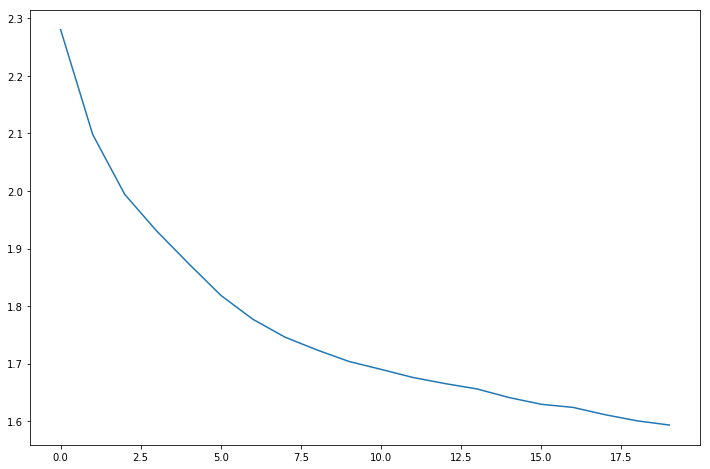

In [71]:
def convolution2b_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# build the model
model = convolution2b_model()
# Fit the model
results = model.fit(X_train, y_train, validation_split=0.1, epochs=20, batch_size=1000, verbose=1)
plt.plot(results.history['loss'])
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Convolution Error with 2 hidden layers: %.2f%%" % (100-scores[1]*100))

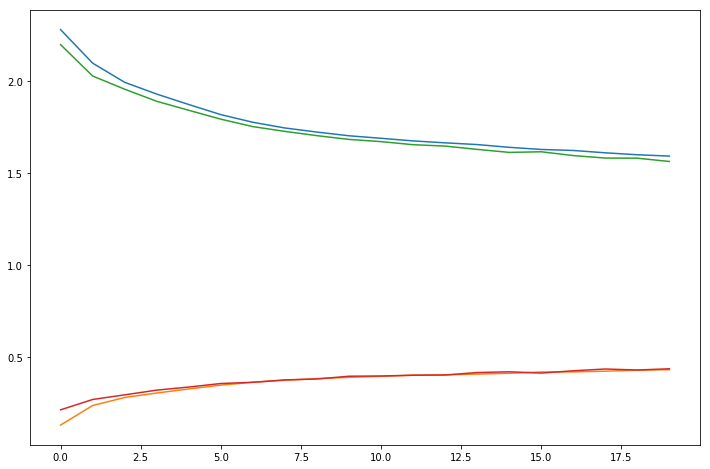

In [80]:
plt.plot(results.history['loss'])
plt.plot(results.history['acc'])
plt.plot(results.history['val_loss'])
plt.plot(results.history['val_acc'])

In [81]:
scores

[1.5527589864730835, 0.4491]

https://cambridgespark.com/content/tutorials/convolutional-neural-networks-with-keras/index.html

In [ ]:
batch_size = 32 # in each iteration, we consider 32 training examples at once
num_epochs = 200 # we iterate 200 times over the entire training set
kernel_size = 3 # we will use 3x3 kernels throughout
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth_1 = 32 # we will initially have 32 kernels per conv. layer...
conv_depth_2 = 64 # ...switching to 64 after the first pooling layer
drop_prob_1 = 0.25 # dropout after pooling with probability 0.25
drop_prob_2 = 0.5 # dropout in the FC layer with probability 0.5
hidden_size = 512 # the FC layer will have 512 neurons

In [ ]:
def convolution2c_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (1, 1), input_shape=(32, 32, 3), activation='relu'))
    model.add(Conv2D(32, (1, 1), input_shape=(32, 32, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# build the model
model = convolution2c_model()
# Fit the model
results = model.fit(X_train, y_train, validation_split=0.1, epochs=20, batch_size=1000, verbose=1)
plt.plot(results.history['loss'])
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Convolution Error with 2 hidden layers: %.2f%%" % (100-scores[1]*100))

In [ ]:
def convolution3_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

# build the model
model = convolution3_model()
# Fit the model
results = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=1000, verbose=1)
plt.plot(results.history['loss'])
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
scores
print("Convolution Error with 2 hidden layers: %.2f%%" % (100-scores[1]*100))

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 188s - loss: 2.2569 - acc: 0.1401 - val_loss: 2.0831 - val_acc: 0.2112
Epoch 2/20
40000/40000 [==============================] - 187s - loss: 2.0371 - acc: 0.2528 - val_loss: 1.9771 - val_acc: 0.2858
Epoch 3/20
40000/40000 [==============================] - 172s - loss: 1.9618 - acc: 0.2895 - val_loss: 1.9126 - val_acc: 0.3121
Epoch 4/20
40000/40000 [==============================] - 177s - loss: 1.8903 - acc: 0.3172 - val_loss: 1.8360 - val_acc: 0.3430
Epoch 5/20
40000/40000 [==============================] - 168s - loss: 1.8336 - acc: 0.3391 - val_loss: 1.7885 - val_acc: 0.3602
Epoch 6/20
40000/40000 [==============================] - 175s - loss: 1.7958 - acc: 0.3573 - val_loss: 1.7617 - val_acc: 0.3783
Epoch 7/20
40000/40000 [==============================] - 190s - loss: 1.7660 - acc: 0.3683 - val_loss: 1.7174 - val_acc: 0.3926
Epoch 8/20
40000/40000 [=======================

[1.4842249984741211, 0.46929999999999999]

Convolution Error with 2 hidden layers: 53.07%


In [ ]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def convolution3_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model
# # fix random seed for reproducibility
# seed = 7
# numpy.random.seed(seed)
# # load dataset
# dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# # split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=convolution3_model, verbose=1)
# define the grid search parameters
batch_size = [10, 50, 100, 250, 500, 1000]
epochs = [20, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

The following code was adapted from:
https://notebooks.azure.com/anon-yqopra/libraries/pydata/html/workspace.ipynb

In [ ]:
len(x_train), len(y_train), len(x_test), len(y_test)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

def display_images_and_labels(images, labels):
    """Display the first image of each label."""
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()

In [ ]:
display_images_and_labels(x_train, y_train)